In [1]:
import math
import torch
from torch import nn
from torch.nn import init
from torch.nn.modules import loss
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
train_dataset = datasets.ImageFolder('Dataset/train', transform = transforms.ToTensor())
test_dataset = datasets.ImageFolder('Dataset/test', transform = transforms.ToTensor())

In [3]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 501
    Root location: Dataset/train
    StandardTransform
Transform: ToTensor()

In [4]:
test_dataset

Dataset ImageFolder
    Number of datapoints: 125
    Root location: Dataset/test
    StandardTransform
Transform: ToTensor()

In [5]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [6]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
toPIL = transforms.ToPILImage()

In [8]:
def example(i):
    print(train_dataset[i][1])
    return toPIL(train_dataset[i][0]).resize((256, 256))

0


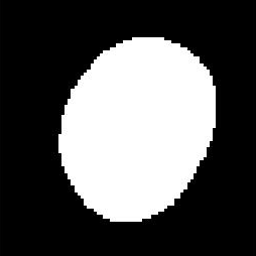

In [9]:
example(0)

In [10]:
train_loader.__iter__().__next__()[1]

tensor([0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 2,
        1, 0, 1, 0, 0, 1, 1, 1])

In [11]:
train_loader.__iter__().__next__()[0].shape


torch.Size([32, 3, 254, 254])

In [12]:
def train(model, train_loader, optimizer, loss_function, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 5 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [13]:
def test(model, test_loader, loss_function):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += loss_function(output, target).sum().item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    return 100. * correct / len(test_loader.dataset)

In [14]:
model_batchnorm = nn.Sequential(nn.Flatten(),
                      nn.Linear(193548, 512), 
                      nn.BatchNorm1d(512),
                      nn.ReLU(),
                      nn.Linear(512, 256), 
                      nn.BatchNorm1d(256),
                      nn.ReLU(),
                      nn.Linear(256, 64), 
                      nn.BatchNorm1d(64),
                      nn.ReLU(),
                      nn.Linear(64, 3),
                      nn.BatchNorm1d(3))
optimizer = optim.SGD(model_batchnorm.parameters(), lr=0.01)
loss_function = loss.CrossEntropyLoss()

for epoch in range(20):
        train(model_batchnorm, train_loader, optimizer, loss_function, epoch)
        test(model_batchnorm, test_loader, loss_function)

Train Epoch: 0 [0/501 (0%)]	Loss: 1.290470
Train Epoch: 0 [160/501 (31%)]	Loss: 0.879520
Train Epoch: 0 [320/501 (62%)]	Loss: 0.737403
Train Epoch: 0 [315/501 (94%)]	Loss: 0.412995

Test set: Average loss: 0.0256, Accuracy: 81/125 (65%)

Train Epoch: 1 [0/501 (0%)]	Loss: 0.510599
Train Epoch: 1 [160/501 (31%)]	Loss: 0.319032
Train Epoch: 1 [320/501 (62%)]	Loss: 0.422188
Train Epoch: 1 [315/501 (94%)]	Loss: 0.463822

Test set: Average loss: 0.0189, Accuracy: 104/125 (83%)

Train Epoch: 2 [0/501 (0%)]	Loss: 0.394420
Train Epoch: 2 [160/501 (31%)]	Loss: 0.368418
Train Epoch: 2 [320/501 (62%)]	Loss: 0.353466
Train Epoch: 2 [315/501 (94%)]	Loss: 0.367363

Test set: Average loss: 0.0173, Accuracy: 99/125 (79%)

Train Epoch: 3 [0/501 (0%)]	Loss: 0.283121
Train Epoch: 3 [160/501 (31%)]	Loss: 0.268302
Train Epoch: 3 [320/501 (62%)]	Loss: 0.326449
Train Epoch: 3 [315/501 (94%)]	Loss: 0.274672

Test set: Average loss: 0.0152, Accuracy: 106/125 (85%)

Train Epoch: 4 [0/501 (0%)]	Loss: 0.285316
Tra

In [16]:
model_dropout = nn.Sequential(nn.Flatten(),
                      nn.Linear(193548, 512), 
                      nn.BatchNorm1d(512),
                      nn.ReLU(),
                      nn.Dropout(0.4),
                      nn.Linear(512, 256), 
                      nn.BatchNorm1d(256),
                      nn.ReLU(),
                      nn.Dropout(0.3),
                      nn.Linear(256, 64), 
                      nn.BatchNorm1d(64),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(64, 3),
                      nn.BatchNorm1d(3))
optimizer = optim.SGD(model_dropout.parameters(), lr=0.01)
loss_function = loss.CrossEntropyLoss()
    

for epoch in range(20):
        train(model_dropout, train_loader, optimizer, loss_function, epoch)
        test(model_dropout, test_loader, loss_function)

Train Epoch: 0 [0/501 (0%)]	Loss: 1.442661
Train Epoch: 0 [160/501 (31%)]	Loss: 0.787907
Train Epoch: 0 [320/501 (62%)]	Loss: 0.795146
Train Epoch: 0 [315/501 (94%)]	Loss: 0.627036

Test set: Average loss: 0.0256, Accuracy: 82/125 (66%)

Train Epoch: 1 [0/501 (0%)]	Loss: 0.629832
Train Epoch: 1 [160/501 (31%)]	Loss: 0.567743
Train Epoch: 1 [320/501 (62%)]	Loss: 0.651833
Train Epoch: 1 [315/501 (94%)]	Loss: 0.777818

Test set: Average loss: 0.0217, Accuracy: 79/125 (63%)

Train Epoch: 2 [0/501 (0%)]	Loss: 0.656914
Train Epoch: 2 [160/501 (31%)]	Loss: 0.747171
Train Epoch: 2 [320/501 (62%)]	Loss: 0.536830
Train Epoch: 2 [315/501 (94%)]	Loss: 0.517003

Test set: Average loss: 0.0166, Accuracy: 107/125 (86%)

Train Epoch: 3 [0/501 (0%)]	Loss: 0.566710
Train Epoch: 3 [160/501 (31%)]	Loss: 0.514399
Train Epoch: 3 [320/501 (62%)]	Loss: 0.511275
Train Epoch: 3 [315/501 (94%)]	Loss: 0.676070

Test set: Average loss: 0.0168, Accuracy: 108/125 (86%)

Train Epoch: 4 [0/501 (0%)]	Loss: 0.404628
Tra

In [ ]:
model_cnn = nn.Sequential(
                      nn.Conv2d(3, 48, 7, bias=False),
                      nn.BatchNorm2d(48), 
                      nn.Conv2d(48, 96, 7, bias=False),
                      nn.BatchNorm2d(96), 
                      nn.Linear(242, 3, bias=False),
                      nn.BatchNorm1d(3))
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)
loss_function = loss.CrossEntropyLoss()
    

for epoch in range(20):
        train(model_cnn, train_loader, optimizer, loss_function, epoch)
        test(model_cnn, test_loader, loss_function)